<h1>Phoenix AI & Machine Learning Group</h1>
<h2>Let's get Neural: Solving the MNIST Dataset (Python) Part 1/3</h2>

<h4>Community Support</h4>

As always, a generous shoutout to the community, without these contributions, my understanding of Neural Networks would have taken much longer! <br>

Most code directly copied from @Trask: http://iamtrask.github.io/2015/07/12/basic-python-network/

<i>Other Works Cited: </i>
- http://cs231n.github.io/neural-networks-1/
- http://www.cse.unsw.edu.au/~billw/mldict.html
- https://en.wikipedia.org/wiki/Backpropagation
- https://www.quora.com/What-is-the-role-of-the-activation-function-in-a-neural-network
- http://www.wildml.com/2015/09/implementing-a-neural-network-from-scratch/
- http://squall0032.tumblr.com/post/77300791096/plotting-a-sigmoid-function-using
- http://stevenmiller888.github.io/mind-how-to-build-a-neural-network/
- http://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html

<h2>2 Layer Neural Network</h2>

In [15]:
# Import the NumPy (Numerical) Module
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# Define our Sigmoid 'Activation Function'
def sigmoid(x,deriv=False):
    if(deriv==True):
        return sigmoid(x)*(1-sigmoid(x))
    return 1/(1+np.exp(-x))

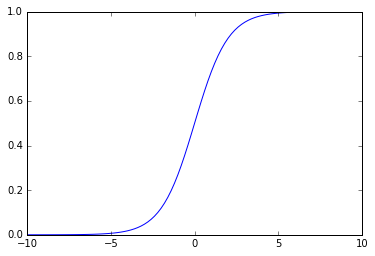

In [29]:
# Our Function's Curve
# Looks like a handy function to calculate a gradient! 
sig = sigmoid(x,deriv=False)
plt.plot(x,sig)
plt.show()

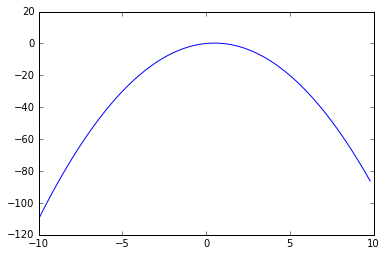

In [30]:
# Calculate our Sigmoidal Gradient (Derivative)
sig = sigmoid(x,deriv=True)
plt.plot(x,sig)
plt.show()

<h3>Creating the Input Neurons - 'X'</h3>

In [38]:
# Instantiate our Input Layer Neurons
# Four Rows (Dimensions) of Three Neurons
# E.x.: 0,0,1 = 3 Neurons
X = np.array([  [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] ])

<h3>Creating the Training Example - 'y'</h3>

In [40]:
# Each >row< is a training example - 'exepected output'
y = np.array([[0,0,1,1]]).T
print y

[[0]
 [0]
 [1]
 [1]]


<h3>Creating the Synapse - syn0</h3>

In [80]:
# Seed our pseudo-random number generator
# If we need to debug the network, we can use this as a reference point
# Your numbers will still be randomly distributed, but they'll be randomly
# distributed in exactly the same way each time you train.
# This makes it easier to see how your changes affect the network.
np.random.seed(1)

In [39]:
# Random weights to ensure our network is actually learning (connected synapses)
# Match these to each dimension / row / list above in 'X'
# Note: It's best practice here to have a weight initialization mean of zero
syn0 = 2*np.random.random((3,1)) - 1
print syn0

[[-0.62747958]
 [-0.30887855]
 [-0.20646505]]


<h3>Forward Propagation - Start the Network!</h3>

<img src = 'https://iamtrask.github.io/img/toy_network_batch.png' width="700" height="400">

In [42]:
# Our 1st Layer of the Network
# Note: We are feeding >ALL< our input rows [layers]
#       into the network at once: Full Batch Training
l0 = X
print l0

[[0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]]


<h3> Matrix Dot Multiplication </h3>
<img src = 'https://www.mathsisfun.com/algebra/images/matrix-multiply-a.gif'>

In [62]:
# The hidden layer of the network!
# Multiply our 'l0' 4D array by our randomly initialized weights
# (4 x 3) dot (3 x 1) = (4 x 1) - See image above
l1 = sigmoid(np.dot(l0,syn0))

# And we could end the network here, just print the results!
# Printing the results is equivalent to generating our 'output' layer
print l1

[[ 0.44856632]
 [ 0.3739417 ]
 [ 0.30281165]
 [ 0.2418024 ]]


In [50]:
# Hmm, seems pretty terrible.
# Let's see if we can train our network to do better!

<h3>Backwards Propagation of Errors: Backprop</h3>

In [53]:
# Calculate how much error we have against our training set
# I.e.: How much did we miss our target by?
l1_error = y - l1
print l1_error

[[-0.44856632]
 [-0.3739417 ]
 [ 0.69718835]
 [ 0.7581976 ]]


<h3>Tracking our Sigmoidal Derivatives</h3>
<img src = 'https://iamtrask.github.io/img/sigmoid-deriv-2.png' width="700" height="400">
<br>
<b>
- High values, x=2.0 (green dot) = shallow slope
- Low values, x=-1.0 (purple dot) = shallow slope
- Highest slope is x=0 (blue dot)
- Also notice that all derivatives are between 0 and 1
</b>

In [83]:
# But how do we 'train' the neurons? We have to impact their weights (synapses).
# Let's do it like this: Since we now know the amount of 'miss' we have - 
# (how much we missed by) * (gradient [derivative] of the values in 'l1')
# Note: "The Error Weighted Derivative" is an OK method for this example,
#        but there are certainly more mathematically precise ways to do this.
#
# To say it another way:
#        When we multiply the "slopes" by the error, we are >reducing< our network's error!
l1_delta = l1_error * sigmoid(l1,True)
print l1_delta

[[ -9.25705804e-05]
 [ -6.13383729e-05]
 [  4.08043484e-05]
 [  6.16432895e-05]]


In [66]:
# Awesome! Now, let's use this to update our synapse's appropriately
syn0 += np.dot(l0.T,l1_delta)
# Here is our new synapse strengths:
print syn0

[[ 0.51728658]
 [-0.10303788]
 [ 0.14430846]]


<h3>Our First ANN Results!</h3>

In [69]:
print ('Input Layer')
print X
print
print ('Training Set')
print y
print
print "Our Final Output After ANN Training: Epoch 0"
print l1

Input Layer
[[0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]]

Training Set
[[0]
 [0]
 [1]
 [1]]

Our Final Output After ANN Training: Epoch 0
[[ 0.44856632]
 [ 0.3739417 ]
 [ 0.30281165]
 [ 0.2418024 ]]


<h3>Mapping our ANN: Epoch0</h3>
<img src = 'https://iamtrask.github.io/img/toy_network_deriv.png' width="700" height="400">

<h3>Improving Our Network's Accuracy</h3>

In [72]:
# Okay, this is admittedly not the greatest.
# Let's crank up the number of epochs
# Remember: Everytime we update the synapse strengths, our network gets smarter!

In [73]:
# Updates the weights over 10,000 epochs:

for iter in xrange(10000):
    l0 = X
    l1 = nonlin(np.dot(l0,syn0))
    l1_error = y - l1
    l1_delta = l1_error * nonlin(l1,True)
    # Update weights for each epoch
    syn0 += np.dot(l0.T,l1_delta)

print "Output After Training:"
print l1

Output After Training:
[[ 0.00966821]
 [ 0.00786286]
 [ 0.99359161]
 [ 0.99211755]]


<h3>Success!</h3>

In [85]:
print ('Input Layer')
print X
print
print ('Training Set')
print y
print
print "Output Layer: Epoch 10,001"
print l1

Input Layer
[[0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]]

Training Set
[[0]
 [0]
 [1]
 [1]]

Output Layer: Epoch 10,001
[[ 0.00966821]
 [ 0.00786286]
 [ 0.99359161]
 [ 0.99211755]]
